## Limpeza e Tratamento dos Dados

In [ ]:
#Limpeza e tratamento dos dados
#Lendo o arquivo CSV com encoding e separador corretos, tratando possíveis problemas de formatação

import pandas as pd

df = pd.read_csv('dados/datatran2024.csv', encoding='latin1', sep=';', quoting=1)

#Removendo espaços extras dos nomes das colunas

df.columns = [col.strip() for col in df.columns]

#Exibindo as primeiras linhas para conferência

print('Amostra dos dados após leitura e limpeza inicial:')
print(df.head())

#Verificando valores ausentes

print('\
Valores ausentes por coluna:')
print(df.isnull().sum())

Amostra dos dados após leitura e limpeza inicial:
       id data_inversa     dia_semana   horario  uf   br   km  \
0  571789   01/01/2024  segunda-feira  03:56:00  ES  101   38   
1  571804   01/01/2024  segunda-feira  04:50:00  PI  343  185   
2  571806   01/01/2024  segunda-feira  04:30:00  BA  116  578   
3  571818   01/01/2024  segunda-feira  06:30:00  SE  101   18   
4  571838   01/01/2024  segunda-feira  05:00:00  MT  364  240   

            municipio                                     causa_acidente  \
0  CONCEICAO DA BARRA                             Ultrapassagem Indevida   
1            PIRIPIRI                        Manobra de mudança de faixa   
2             BREJOES                   Ingestão de álcool pelo condutor   
3    MALHADA DOS BOIS           Reação tardia ou ineficiente do condutor   
4        RONDONOPOLIS  Condutor deixou de manter distância do veículo...   

                    tipo_acidente  ... feridos_graves ilesos ignorados  \
0  Colisão lateral sentido o

C:\Users\Thallia\AppData\Local\Temp\ipykernel_8704\3517486712.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dados/datatran2024.csv', encoding='latin1', sep=';', quoting=1)


<br>
<hr>

## **Análise Exploratória Inicial**

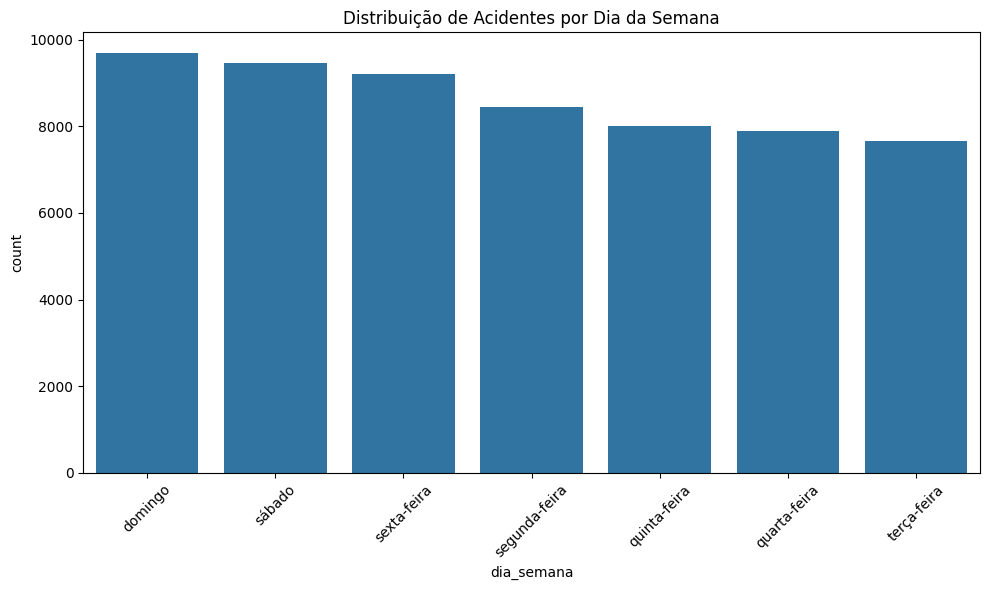

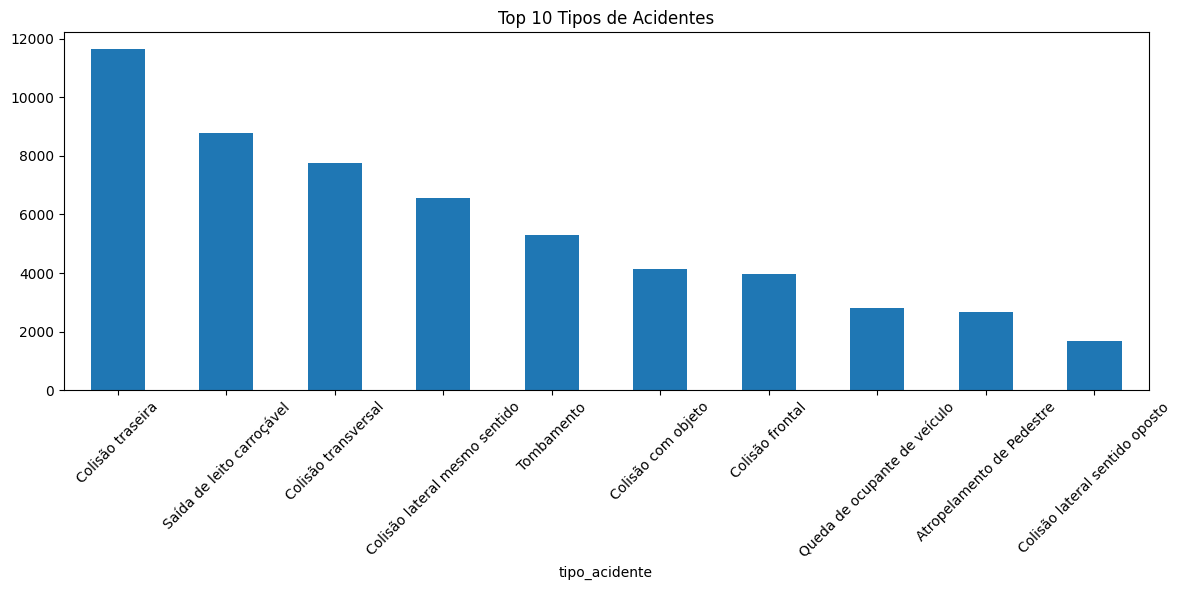

Estatísticas de gravidade dos acidentes:
classificacao_acidente
Com Vítimas Feridas    46299
Sem Vítimas             9768
Com Vítimas Fatais      4297
Name: count, dtype: int64


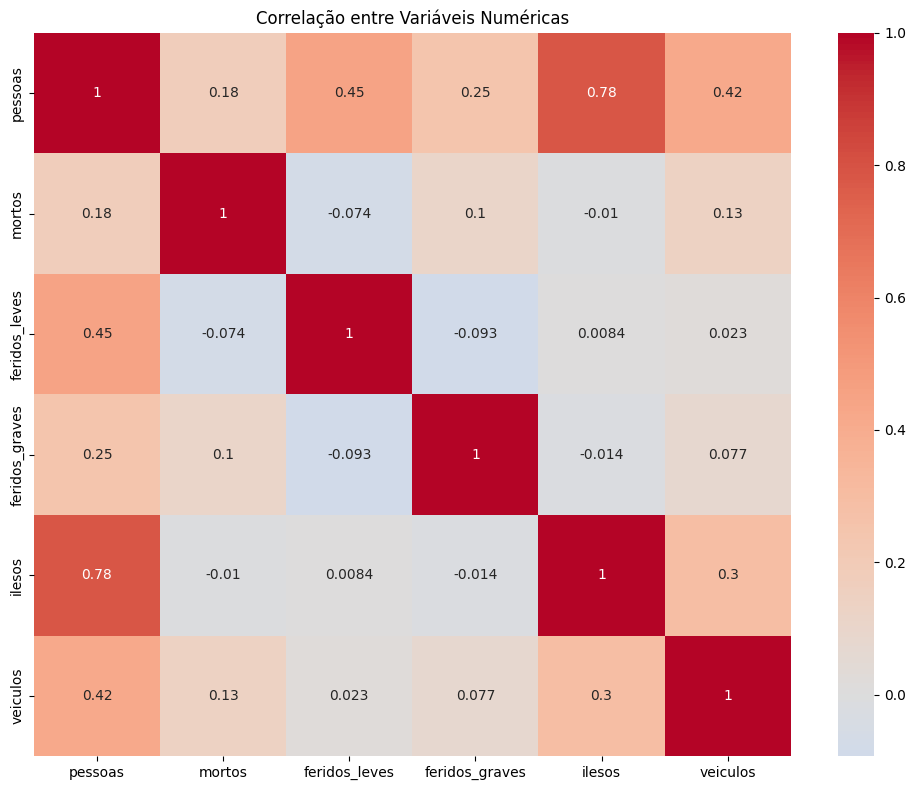

In [ ]:
#Análise Exploratória Inicial
#Imports

import seaborn as sns
import matplotlib.pyplot as plt

#Convertendo data para datetime
df['data'] = pd.to_datetime(df['data_inversa'], format='%d/%m/%Y')

#Plotando a figura - Distribuição de acidentes por dia da semana

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dia_semana', order=df['dia_semana'].value_counts().index)
plt.title('Distribuição de Acidentes por Dia da Semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Plotando a figura - Distribuição por tipo de acidente

plt.figure(figsize=(12, 6))
df['tipo_acidente'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Tipos de Acidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Análise de gravidade

print('\
Estatísticas de gravidade dos acidentes:')
print(df['classificacao_acidente'].value_counts())

#Plotando a figura - Correlação entre variáveis numéricas

numeric_cols = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'veiculos']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

<br>
<hr>

## **Desenvolvimento do Modelo Preditivo**

Métricas do Modelo:
              precision    recall  f1-score   support

           0       0.28      0.12      0.17       847
           1       0.79      0.93      0.86      9248
           2       0.49      0.19      0.28      1978

    accuracy                           0.76     12073
   macro avg       0.52      0.42      0.43     12073
weighted avg       0.71      0.76      0.71     12073



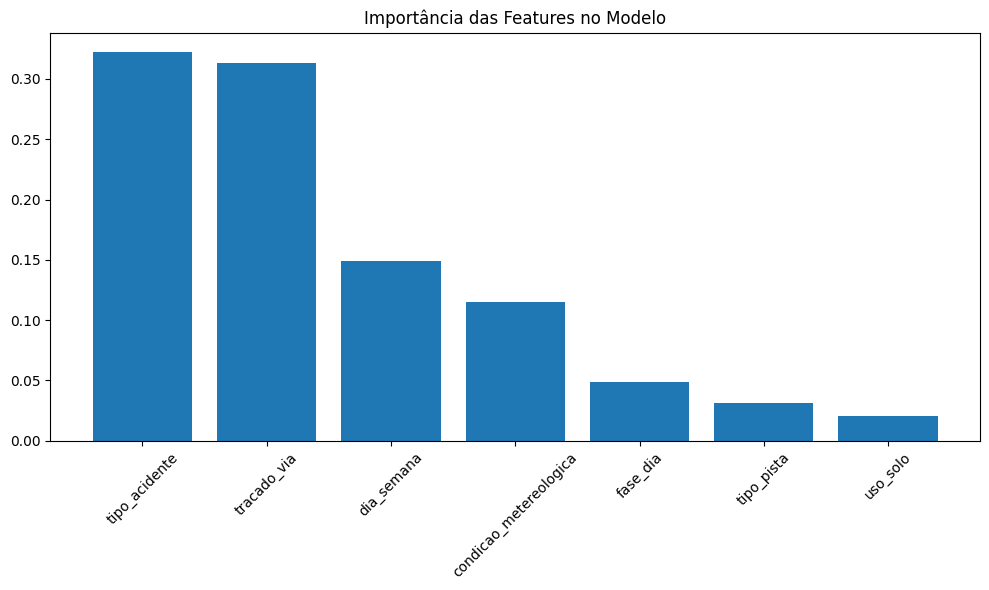

In [ ]:
#Preparação para modelagem e desenvolvimento do modelo preditivo
#Imports

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

#Selecionando as features mais relevantes

features = ['dia_semana', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 
           'tracado_via', 'uso_solo', 'tipo_acidente']
target = 'classificacao_acidente'

#Preparando os dados

X = df[features].copy()
y = df[target].fillna('Sem Vítimas')

#Realizando o Encoding

le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col].astype(str))
y = le.fit_transform(y)

#Split treino-teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Treinamento do modelo

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#Avaliação do modelo

y_pred = rf.predict(X_test)
print("Métricas do Modelo:")
print(classification_report(y_test, y_pred))

#Exibindo a Importância das features

importances = pd.DataFrame({
    'feature': features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

#Plotando a figura

plt.figure(figsize=(10, 6))
plt.bar(importances['feature'], importances['importance'])
plt.xticks(rotation=45)
plt.title('Importância das Features no Modelo')
plt.tight_layout()
plt.show()

<hr>
<br>

## **Criação dos Gráficos**

In [ ]:
#Ajustando o layout dos subplots para incluir um tipo 'domain' para o gráfico de pizza  

fig = make_subplots(  
    rows=2, cols=2,  
    subplot_titles=('Acidentes por Mês', 'Distribuição por UF', 'Tipos de Acidentes', 'Condições Meteorológicas'),  
    specs=[[{"type": "xy"}, {"type": "xy"}],  
           [{"type": "xy"}, {"type": "domain"}]]  #O último é 'domain' para o Pie  
)  
  
#Acidentes por mês  

fig.add_trace(go.Bar(x=acidentes_por_mes['mes'], y=acidentes_por_mes['quantidade'],  
                     name='Acidentes por Mês'), row=1, col=1)  
  
#Distribuição por UF  

uf_counts = df['uf'].value_counts().head(10)  
fig.add_trace(go.Bar(x=uf_counts.index, y=uf_counts.values,  
                     name='Acidentes por UF'), row=1, col=2)  
  
#Tipos de acidentes  

tipo_counts = df['tipo_acidente'].value_counts().head(10)  
fig.add_trace(go.Bar(x=tipo_counts.index, y=tipo_counts.values,  
                     name='Tipos de Acidentes'), row=2, col=1)  
  
#Condições meteorológicas  

cond_counts = df['condicao_metereologica'].value_counts()  
fig.add_trace(go.Pie(labels=cond_counts.index, values=cond_counts.values,  
                     name='Condições Meteorológicas'), row=2, col=2)  
  
fig.update_layout(height=800, width=1200, showlegend=False, title_text='Dashboard de Acidentes Rodoviários')  
  
#Salvando o dashboard interativo  

fig.write_html('dashboard_acidentes.html')  
  
print("Dashboard interativo foi criado e salvo como 'dashboard_acidentes.html'")  

Dashboard interativo foi criado e salvo como 'dashboard_acidentes.html'


<br>
<hr>

## **Criação do Dashboard**

In [ ]:
#Criando visualizações finais separadas

#Import da biblioteca plotly

import plotly.express as px

#Acidentes por mês

acidentes_por_mes = df.groupby(df['data'].dt.month)['id'].count().reset_index()
fig1 = px.bar(acidentes_por_mes, x='data', y='id', title='Acidentes por Mês')
fig1.write_html('acidentes_por_mes.html')

#Mapa de calor por UF  

uf_counts = df['uf'].value_counts().reset_index()  
uf_counts.columns = ['uf', 'contagem']  # Renomeia as colunas para ficar mais claro  
fig2 = px.bar(uf_counts, x='uf', y='contagem', title='Acidentes por UF')  
fig2.write_html('acidentes_por_uf.html')  

print("Visualizações interativas foram criadas e salvas.")

#Resumo final

print("\
Resumo da análise:")
print("Total de acidentes:", len(df))
print("Período analisado:", df['data'].min().strftime('%d/%m/%Y'), "a", df['data'].max().strftime('%d/%m/%Y'))
print("UFs com mais acidentes:", df['uf'].value_counts().head(3).to_string())

Visualizações interativas foram criadas e salvas.
Resumo da análise:
Total de acidentes: 60365
Período analisado: 01/01/2024 a 31/10/2024
UFs com mais acidentes: uf
MG    7597
SC    6916
PR    6213


In [ ]:
#Resumo final da análise

print("RESUMO DA ANÁLISE:")
print("\
Total de acidentes:", len(df))
print("\
Principais insights:")
print("- Maior concentração de acidentes com vítimas feridas:", df['classificacao_acidente'].value_counts().iloc[0])
print("- Dia da semana com mais acidentes:", df['dia_semana'].value_counts().index[0])
print("- Tipo de acidente mais comum:", df['tipo_acidente'].value_counts().index[0])

#Salvando dataset limpo

df.to_csv('acidentes_tratados.csv', index=False)
print("\
Dataset tratado salvo como 'acidentes_tratados.csv'")

RESUMO DA ANÁLISE:
Total de acidentes: 60365
Principais insights:
- Maior concentração de acidentes com vítimas feridas: 46299
- Dia da semana com mais acidentes: domingo
- Tipo de acidente mais comum: Colisão traseira
Dataset tratado salvo como 'acidentes_tratados.csv'
